In [1]:
'''
This notebook contains a quick experiment to compare counts and frequencies
of "he" and "she" across four 19th century novels.
Created for the first DH MIT Lab meeting, 2018-09-10.
'''

'\nThis notebook contains a quick experiment to compare counts and frequencies\nof "he" and "she" across four 19th century novels.\nCreated for the first DH MIT Lab meeting, 2018-09-10.\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_he_she(data = (), display_mode='counts'):
    
    # Configure size and font
    plt.rcParams.update({
        "figure.figsize": (16, 10),
    })
    font = {
        'weight' : 'bold',
        'size'   : 16,
    }
    plt.rc('font', **font)
    
    bars1 = np.array(data[0]) 
    bars2 = np.array(data[1]) 
    bars3 = np.array(data[2]) 
    bars4 = np.array(data[3]) 
    
    # For frequencies, display data as percentages
    if display_mode == 'frequencies':
        bars1 *= 100
        bars2 *= 100
        bars3 *= 100
        bars4 *= 100
    
    # Set width of bar
    bar_width = 0.15
    margin = 0.60

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    r4 = [x + bar_width for x in r3]

    # Make the plot
    plt.bar(r1, bars1, color='k', width=bar_width, edgecolor='white', 
            label='Austen, Persuasion')
    plt.bar(r2, bars2, color='dimgray', width=bar_width, edgecolor='white', 
            label='Dickens, Tale of Two Cities')
    plt.bar(r3, bars3, color='darkgray', width=bar_width, edgecolor='white', 
            label='Eliot, Middlemarch')
    plt.bar(r4, bars4, color='lightgray', width=bar_width, edgecolor='white', 
            label='Hawthorne, Scarlet Letter')

    # Add labels
    plt.xlabel('Active Gender Pronouns', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(bars1))], ['He', 'She'])
    
    if display_mode == 'counts':
        plt.ylabel('Counts')
    elif display_mode == 'frequencies':
        plt.ylabel('Frequencies')
        locs, labels = plt.yticks()
        plt.yticks(locs, ['{:.2f}%'.format(x) for x in locs])

    # Create legend & Show graphic
    plt.legend()
    plt.legend(loc=(1.04,0))
    plt.show()

In [3]:
def load_novel_text(file_name):
    
    base_path = '../corpora/sample_novels/texts'
    full_path = f'{base_path}/{file_name}'
    
    with open(full_path) as text_file:
        text = text_file.read()
        
    return text

In [4]:
austen = load_novel_text('austen_persuasion.txt')
austen[:100]

'\ufeffThe Project Gutenberg EBook of Persuasion, by Jane Austen\n\nThis eBook is for the use of anyone anyw'

In [5]:
dickens = load_novel_text('dickens_twocities.txt')
eliot = load_novel_text('eliot_middlemarch.txt')
hawthorne = load_novel_text('hawthorne_scarlet.txt')

In [6]:
def count_he_she(novel):
    novel_words = novel.lower().split()
    he_count = novel_words.count('he')
    she_count = novel_words.count('she')
    return (he_count, she_count)

In [7]:
austen_counts = count_he_she(austen)
austen_counts

(917, 1113)

In [8]:
dickens_counts = count_he_she(dickens)
eliot_counts = count_he_she(eliot)
hawthorne_counts = count_he_she(hawthorne)

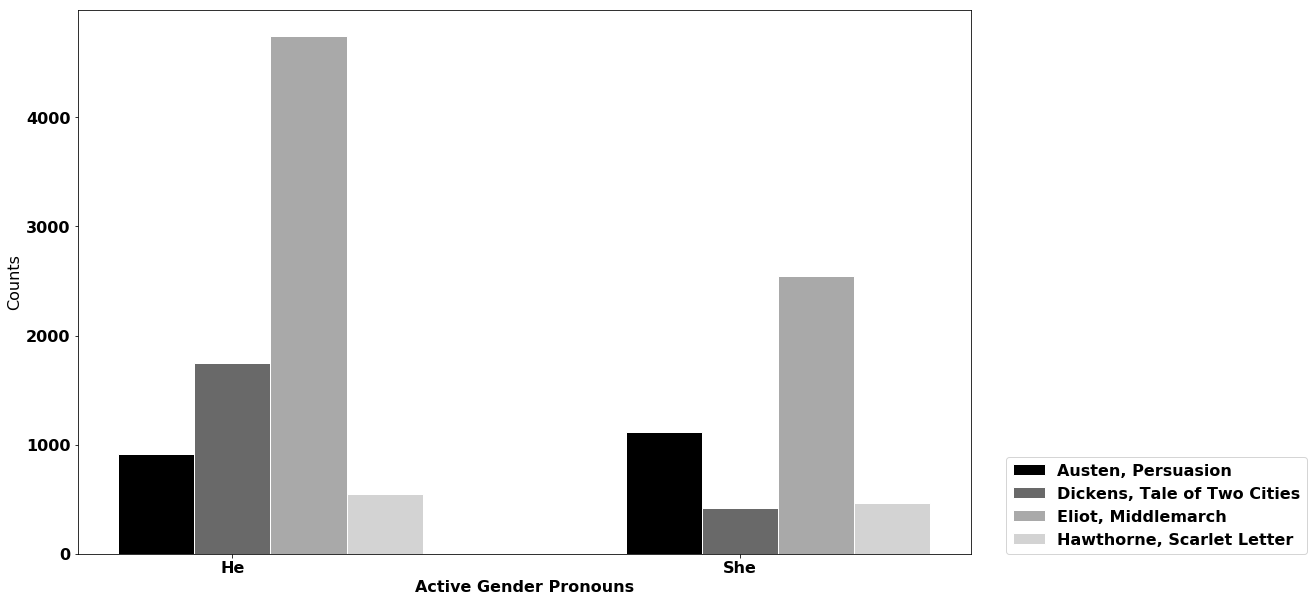

In [9]:
data = (austen_counts, dickens_counts, eliot_counts, hawthorne_counts)
plot_he_she(data, display_mode='counts')

In [10]:
def freq_he_she(novel):
    count_he, count_she = count_he_she(novel)
    freq_he = count_he / len(novel.split())
    freq_she = count_she / len(novel.split())
    return freq_he, freq_she

In [11]:
austen_freq = freq_he_she(austen)
dickens_freq = freq_he_she(dickens)
eliot_freq = freq_he_she(eliot)
hawthorne_freq = freq_he_she(hawthorne)
austen_freq

(0.010624862409769776, 0.012895825367583163)

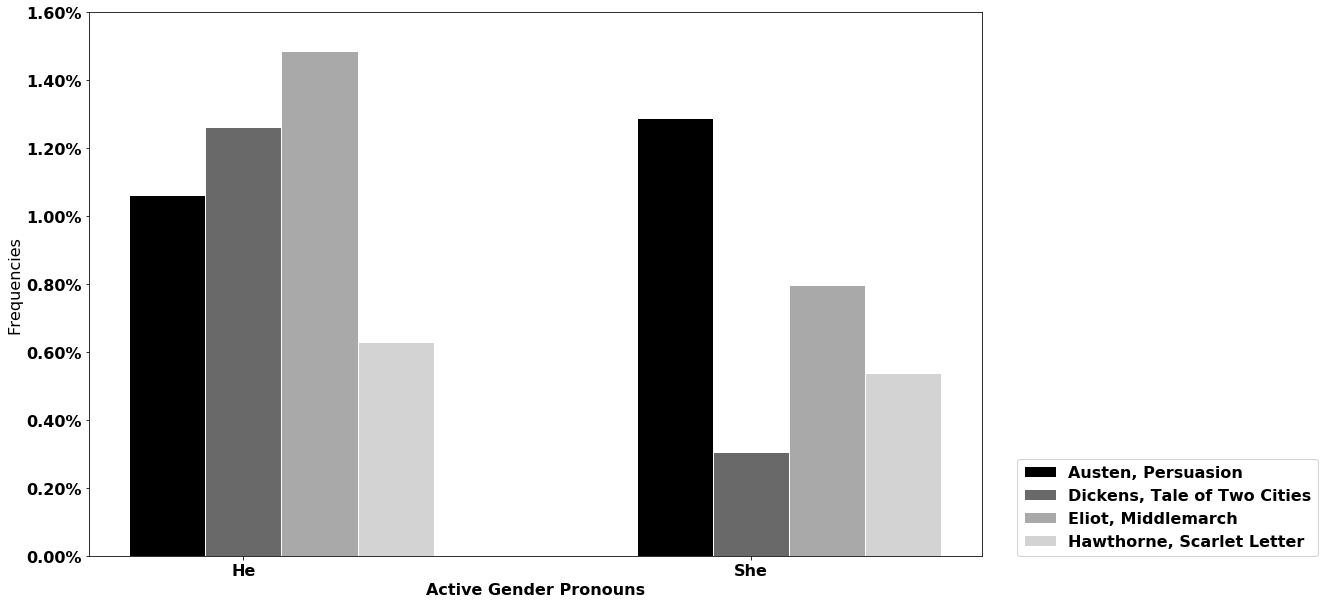

In [12]:
data = (austen_freq, dickens_freq, eliot_freq, hawthorne_freq)
plot_he_she(data, display_mode = 'frequencies')